In [1]:
import CanvasKitInit from 'npm:canvaskit-wasm/bin/canvaskit.js'
import { CanvasKit } from 'npm:canvaskit-wasm'

export const canvasKit: CanvasKit = await CanvasKitInit({
  locateFile: (file) => Deno.env.get("HOME") + '/.cache/deno/npm/registry.npmjs.org/canvaskit-wasm/0.39.1/bin/' + file,
})

In [2]:
import { encodeBase64 } from "jsr:@std/encoding"
import { CanvasKit, Surface } from "npm:canvaskit-wasm"

declare const canvasKit: CanvasKit

const paint = new canvasKit.Paint()
paint.setColor(canvasKit.Color4f(0.9, 0, 0, 1.0))
paint.setStyle(canvasKit.PaintStyle.Stroke)
paint.setAntiAlias(true)
const rr = canvasKit.RRectXY(canvasKit.LTRBRect(10, 60, 210, 260), 10, 10)

const height = 300
const width = 300

const surface: Surface = canvasKit.MakeSurface(height, width)!
const canvas = surface.getCanvas()!
canvas.clear(canvasKit.WHITE)
canvas.drawRRect(rr, paint)


const img = surface.makeImageSnapshot()
const imgBytes = img.encodeToBytes()!
const imgBase64 = encodeBase64(imgBytes)

console.log(imgBase64)


iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAYAAAB5fY51AAAAAXNSR0IArs4c6QAAAARzQklUCAgICHwIZIgAAAbuSURBVHic7du/b9R1HMfxd1uvvZYEaCSht9XF+Tqy4OwiSSdJdHWDgfBXuMLgaBNcJIbZRRcnl94fACFxuVJF/EHp4XE9BxNCYoxX7fHti+/jMbeXV9Lk2e/3k88tTKfTaQEEWGx6AMCsBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuIIVhADMECYggWEEOwgBiCBcQQLCCGYAExBAuI8dZJfMh0NKrxYFAvBoOaPHp0Eh8Jp8LSxkZ1+v16q9+vhZWVpue03sJ0Op3+118e3b1bB7dv1x/ff1+dfr86/X4tXrx4kvugUUd7ezUeDGo8GNTypUt15tq16m5vNz2rtf5zsJ5cvVo1mdTZTz+tpc3NE54Fp8/k4cP67ebNWlhdrfN37jQ9p5WOf4b17FkNu93qXrlS619+KVa0xtI779T6V1/Vyvvv13BtrerwsOlJrXPsJ6xht1sX9/dr8ezZeW2CU+/op59qf3OzNp4+bXpKqxzrCevJ1at1/vPPxYrWW7xwoc599ln98vHHTU9plZmDNbp7t2oyqdUPP5znHoix+tFHNT04qNG9e01PaY2ZXwkfv/dend/ZcWYFr3hx/379+skn9fY33zQ9pRVmCtZ0NKq99fXqOWSEvxkuL1fv4KCq02l6yhtvplfC8WBQnX5/3lsgUmdrq8a7u03PaIWZgvVCsOAfCdbrM1OwJo8eucEO/2Cx16vJcNj0jFbw5Wcg

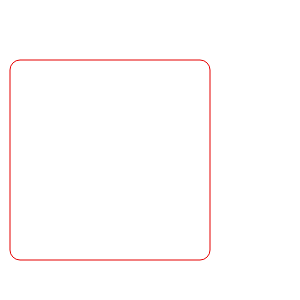

In [3]:
await Deno.jupyter.display({
    'image/png':imgBase64

}, { raw: true })